In [65]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
repo_root = os.popen('git rev-parse --show-toplevel').read().strip()

In [67]:
data_folder = os.path.join(repo_root, 'multi-parameter-estimation', 'data')

# Get list of data directories
data_dirs = os.listdir(data_folder)
data_dirs = [d for d in data_dirs if os.path.isdir(os.path.join(data_folder, d))]
data_dirs.sort()
data_dirs

['2025-05-28--11h-37m-31s',
 '2025-05-28--11h-38m-37s',
 '2025-05-28--11h-39m-30s',
 '2025-05-28--11h-40m-23s',
 '2025-05-28--11h-41m-17s',
 '2025-05-28--11h-42m-11s']

In [68]:
def load_estimates_and_params(data_dir):
    params = pd.read_csv(os.path.join(data_folder, data_dir, "params.csv"))
    estimates = pd.read_csv(os.path.join(data_folder, data_dir, "estimators.csv"))
    estimates["data_dir"] = data_dir
    estimates["theta"] = params["theta"].values[0]
    estimates["delta_phi"] = params["delta_phi"].values[0]
    estimates["repetitions"] = params["repetitions"].values[0]
    return estimates

# Load estimates and parameters for each data directory
estimates_list = []
for data_dir in data_dirs:
    # Skip the directories with no estimates
    if not os.path.exists(os.path.join(data_folder, data_dir, "estimators.csv")):
        continue
    estimates = load_estimates_and_params(data_dir)
    estimates_list.append(estimates)
# Concatenate all estimates into a single DataFrame
estimates_df = pd.concat(estimates_list, ignore_index=True)
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,repetition,theta_estimate,delta_phi_estimate,theta,delta_phi,repetitions
0,2025-05-28--11h-37m-31s,0.5,24.0,15.0,0.5,40.0,NaN,1.340335,0.777898,0.000000,0,500
1,2025-05-28--11h-37m-31s,2.0,22.0,16.0,0.0,40.0,NaN,1.417917,1.570796,0.000000,0,500
2,2025-05-28--11h-37m-31s,0.0,19.0,21.0,0.0,40.0,NaN,1.621580,NaN,0.000000,0,500
3,2025-05-28--11h-37m-31s,2.5,46.0,31.0,0.5,80.0,NaN,1.379272,1.144643,0.000000,0,500
4,2025-05-28--11h-37m-31s,2.5,65.0,52.0,0.5,120.0,NaN,1.460590,1.144643,0.000000,0,500
5,2025-05-28--11h-37m-31s,10.5,341.0,228.0,1.5,581.0,7750.0,1.372036,1.204440,0.000000,0,500
6,2025-05-28--11h-38m-37s,1.0,20.0,14.0,5.0,40.0,NaN,1.417917,0.414972,0.628319,0,500
7,2025-05-28--11h-38m-37s,7.0,270.0,215.0,79.5,571.5,7651.0,1.472937,0.284391,0.628319,0,500
8,2025-05-28--11h-39m-30s,1.0,10.0,5.0,24.0,40.0,NaN,1.443550,0.198439,1.256637,0,500
9,2025-05-28--11h-39m-30s,0.5,12.0,2.0,25.5,40.0,NaN,1.314182,0.137078,1.256637,0,500


In [69]:
estimates_df["theta_degrees"] = np.degrees(estimates_df["theta"])
estimates_df["delta_phi_degrees"] = np.degrees(estimates_df["delta_phi"])
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,repetition,theta_estimate,delta_phi_estimate,theta,delta_phi,repetitions,theta_degrees,delta_phi_degrees
0,2025-05-28--11h-37m-31s,0.5,24.0,15.0,0.5,40.0,NaN,1.340335,0.777898,0.000000,0,500,0.0,0.0
1,2025-05-28--11h-37m-31s,2.0,22.0,16.0,0.0,40.0,NaN,1.417917,1.570796,0.000000,0,500,0.0,0.0
2,2025-05-28--11h-37m-31s,0.0,19.0,21.0,0.0,40.0,NaN,1.621580,NaN,0.000000,0,500,0.0,0.0
3,2025-05-28--11h-37m-31s,2.5,46.0,31.0,0.5,80.0,NaN,1.379272,1.144643,0.000000,0,500,0.0,0.0
4,2025-05-28--11h-37m-31s,2.5,65.0,52.0,0.5,120.0,NaN,1.460590,1.144643,0.000000,0,500,0.0,0.0
5,2025-05-28--11h-37m-31s,10.5,341.0,228.0,1.5,581.0,7750.0,1.372036,1.204440,0.000000,0,500,0.0,0.0
6,2025-05-28--11h-38m-37s,1.0,20.0,14.0,5.0,40.0,NaN,1.417917,0.414972,0.628319,0,500,36.0,0.0
7,2025-05-28--11h-38m-37s,7.0,270.0,215.0,79.5,571.5,7651.0,1.472937,0.284391,0.628319,0,500,36.0,0.0
8,2025-05-28--11h-39m-30s,1.0,10.0,5.0,24.0,40.0,NaN,1.443550,0.198439,1.256637,0,500,72.0,0.0
9,2025-05-28--11h-39m-30s,0.5,12.0,2.0,25.5,40.0,NaN,1.314182,0.137078,1.256637,0,500,72.0,0.0


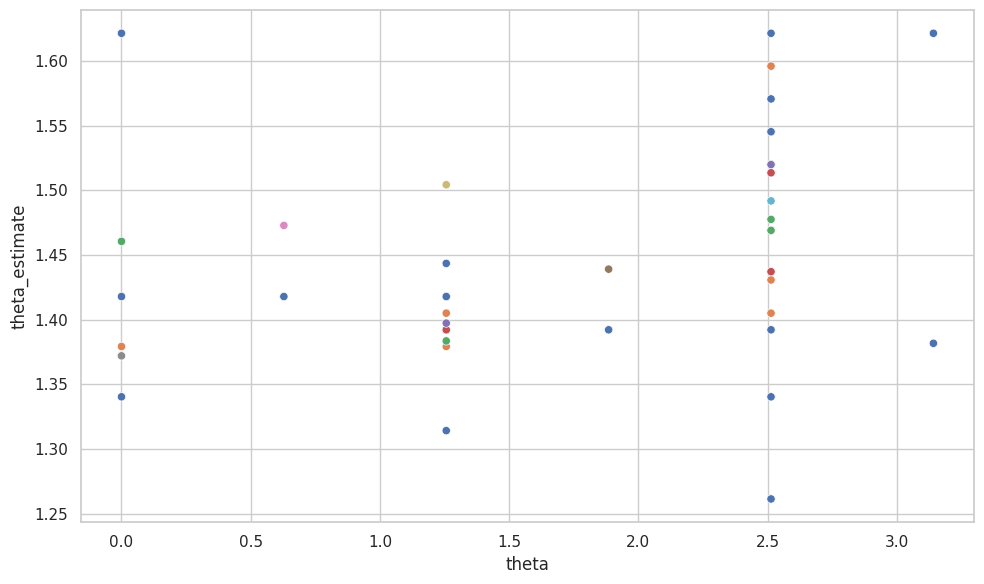

In [70]:
# plot the theta estimate against theta

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="theta", y="theta_estimate", hue="N", palette="deep")

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "theta_estimate_vs_true_theta.png")
plt.savefig(file_name, dpi=300)
plt.show()

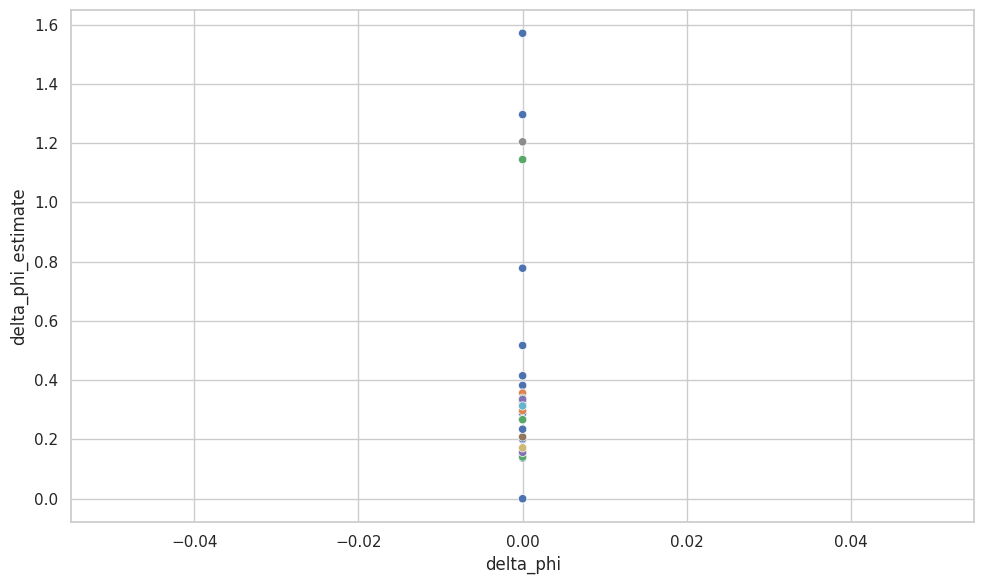

In [71]:
# plot the theta estimate against theta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="delta_phi", y="delta_phi_estimate", hue="N", palette="deep")

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()

# save the figure
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "delta_phi_estimate_vs_true_delta_phi.png")
plt.savefig(file_name, dpi=300)
plt.show()

In [72]:
estimates_summary_df = estimates_df.groupby(["data_dir", "N"]).agg({
    "theta_estimate": ["mean", "std", "var"],
    "delta_phi_estimate": ["mean", "std", "var"],
    "theta": ["mean"],
    "delta_phi": ["mean"]
}).reset_index().rename(columns={"data_dir": "Data Directory"})
estimates_summary_df

Data Directory      N theta_estimate                      \
                                             mean       std       var   
0   2025-05-28--11h-37m-31s   40.0       1.459944  0.145256  0.021099   
1   2025-05-28--11h-37m-31s   80.0       1.379272       NaN       NaN   
2   2025-05-28--11h-37m-31s  120.0       1.460590       NaN       NaN   
3   2025-05-28--11h-37m-31s  581.0       1.372036       NaN       NaN   
4   2025-05-28--11h-38m-37s   40.0       1.417917       NaN       NaN   
5   2025-05-28--11h-38m-37s  571.5       1.472937       NaN       NaN   
6   2025-05-28--11h-39m-30s   40.0       1.397150  0.049809  0.002481   
7   2025-05-28--11h-39m-30s   80.0       1.392168  0.018238  0.000333   
8   2025-05-28--11h-39m-30s  120.0       1.383579       NaN       NaN   
9   2025-05-28--11h-39m-30s  160.0       1.392183       NaN       NaN   
10  2025-05-28--11h-39m-30s  200.0       1.397339       NaN       NaN   
11  2025-05-28--11h-39m-30s  581.5       1.504404       NaN       NaN   
12  2025-05-28--11h-40m-23s   40.0       1.392183       NaN       NaN   
13  2025-05-28--11h-40m-23s  533.5       1.439112       NaN       NaN   
14  2025-05-28--11h-41m-17s   40.0       1.488136  0.125694  0.015799   
15  2025-05-28--11h-41m-17s   80.0       1.475272  0.084791  0.007190   
16  2025-05-28--11h-41m-17s  120.0       1.488903  0.027275  0.000744   
17  2025-05-28--11h-41m-17s  160.0       1.475404  0.054100  0.002927   
18  2025-05-28--11h-41m-17s  200.0       1.520013       NaN       NaN   
19  2025-05-28--11h-41m-17s  592.5       1.491895       NaN       NaN   
20  2025-05-28--11h-42m-11s   40.0       1.621580       NaN       NaN   
21  2025-05-28--11h-42m-11s  632.0       1.381726       NaN       NaN   

   delta_phi_estimate                         theta delta_phi  
                 mean       std       var      mean      mean  
0            1.174347  0.560664  0.314344  0.000000       0.0  
1            1.144643       NaN       NaN  0.000000       0.0  
2            1.144643       NaN       NaN  0.000000       0.0  
3            1.204440       NaN       NaN  0.000000       0.0  
4            0.414972       NaN       NaN  0.628319       0.0  
5            0.284391       NaN       NaN  0.628319       0.0  
6            0.137444  0.082146  0.006748  1.256637       0.0  
7            0.157036  0.018099  0.000328  1.256637       0.0  
8            0.140760       NaN       NaN  1.256637       0.0  
9            0.158058       NaN       NaN  1.256637       0.0  
10           0.156455       NaN       NaN  1.256637       0.0  
11           0.171716       NaN       NaN  1.256637       0.0  
12           0.000000       NaN       NaN  1.884956       0.0  
13           0.208636       NaN       NaN  1.884956       0.0  
14           0.310669  0.144077  0.020758  2.513274       0.0  
15           0.319236  0.044738  0.002001  2.513274       0.0  
16           0.312382  0.039742  0.001579  2.513274       0.0  
17           0.327123  0.005954  0.000035  2.513274       0.0  
18           0.335150       NaN       NaN  2.513274       0.0  
19           0.313239       NaN       NaN  2.513274       0.0  
20                NaN       NaN       NaN  3.141593       0.0  
21           1.296358       NaN       NaN  3.141593       0.0

In [73]:
estimates_summary_df["2_n_var"] = estimates_summary_df["N"] * 2 * estimates_summary_df["theta_estimate"]["var"]
estimates_summary_df["theta_error"] = estimates_summary_df["theta_estimate"]["mean"] - estimates_summary_df["theta"]["mean"]
estimates_summary_df["root_n_theta_error"] = np.sqrt(estimates_summary_df["N"]) * estimates_summary_df["theta_error"]
estimates_summary_df

Data Directory      N theta_estimate                      \
                                             mean       std       var   
0   2025-05-28--11h-37m-31s   40.0       1.459944  0.145256  0.021099   
1   2025-05-28--11h-37m-31s   80.0       1.379272       NaN       NaN   
2   2025-05-28--11h-37m-31s  120.0       1.460590       NaN       NaN   
3   2025-05-28--11h-37m-31s  581.0       1.372036       NaN       NaN   
4   2025-05-28--11h-38m-37s   40.0       1.417917       NaN       NaN   
5   2025-05-28--11h-38m-37s  571.5       1.472937       NaN       NaN   
6   2025-05-28--11h-39m-30s   40.0       1.397150  0.049809  0.002481   
7   2025-05-28--11h-39m-30s   80.0       1.392168  0.018238  0.000333   
8   2025-05-28--11h-39m-30s  120.0       1.383579       NaN       NaN   
9   2025-05-28--11h-39m-30s  160.0       1.392183       NaN       NaN   
10  2025-05-28--11h-39m-30s  200.0       1.397339       NaN       NaN   
11  2025-05-28--11h-39m-30s  581.5       1.504404       NaN       NaN   
12  2025-05-28--11h-40m-23s   40.0       1.392183       NaN       NaN   
13  2025-05-28--11h-40m-23s  533.5       1.439112       NaN       NaN   
14  2025-05-28--11h-41m-17s   40.0       1.488136  0.125694  0.015799   
15  2025-05-28--11h-41m-17s   80.0       1.475272  0.084791  0.007190   
16  2025-05-28--11h-41m-17s  120.0       1.488903  0.027275  0.000744   
17  2025-05-28--11h-41m-17s  160.0       1.475404  0.054100  0.002927   
18  2025-05-28--11h-41m-17s  200.0       1.520013       NaN       NaN   
19  2025-05-28--11h-41m-17s  592.5       1.491895       NaN       NaN   
20  2025-05-28--11h-42m-11s   40.0       1.621580       NaN       NaN   
21  2025-05-28--11h-42m-11s  632.0       1.381726       NaN       NaN   

   delta_phi_estimate                         theta delta_phi   2_n_var  \
                 mean       std       var      mean      mean             
0            1.174347  0.560664  0.314344  0.000000       0.0  1.687942   
1            1.144643       NaN       NaN  0.000000       0.0       NaN   
2            1.144643       NaN       NaN  0.000000       0.0       NaN   
3            1.204440       NaN       NaN  0.000000       0.0       NaN   
4            0.414972       NaN       NaN  0.628319       0.0       NaN   
5            0.284391       NaN       NaN  0.628319       0.0       NaN   
6            0.137444  0.082146  0.006748  1.256637       0.0  0.198477   
7            0.157036  0.018099  0.000328  1.256637       0.0  0.053217   
8            0.140760       NaN       NaN  1.256637       0.0       NaN   
9            0.158058       NaN       NaN  1.256637       0.0       NaN   
10           0.156455       NaN       NaN  1.256637       0.0       NaN   
11           0.171716       NaN       NaN  1.256637       0.0       NaN   
12           0.000000       NaN       NaN  1.884956       0.0       NaN   
13           0.208636       NaN       NaN  1.884956       0.0       NaN   
14           0.310669  0.144077  0.020758  2.513274       0.0  1.263924   
15           0.319236  0.044738  0.002001  2.513274       0.0  1.150326   
16           0.312382  0.039742  0.001579  2.513274       0.0  0.178542   
17           0.327123  0.005954  0.000035  2.513274       0.0  0.936569   
18           0.335150       NaN       NaN  2.513274       0.0       NaN   
19           0.313239       NaN       NaN  2.513274       0.0       NaN   
20                NaN       NaN       NaN  3.141593       0.0       NaN   
21           1.296358       NaN       NaN  3.141593       0.0       NaN   

   theta_error root_n_theta_error  
                                   
0     1.459944           9.233497  
1     1.379272          12.336586  
2     1.460590          15.999965  
3     1.372036          33.071479  
4     0.789599           4.993861  
5     0.844618          20.191498  
6     0.140513           0.888681  
7     0.135531           1.212227  
8     0.126942           1.390583  
9     0.135546           1.714538  
10    0.140702           1.

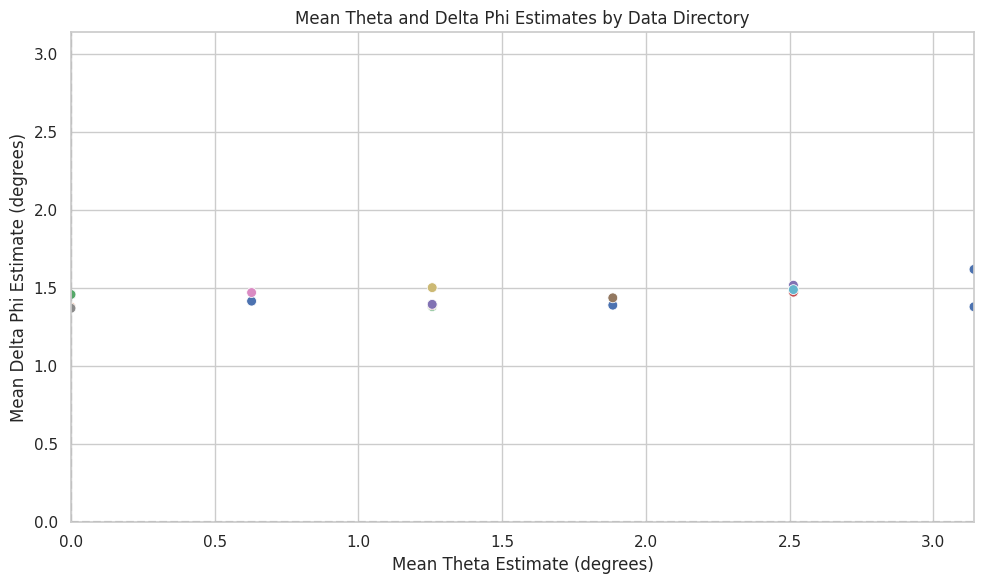

In [74]:
# plot the means as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("theta_estimate", "mean"),
                hue="N", palette="deep", s=50)
plt.title("Mean Theta and Delta Phi Estimates by Data Directory")
plt.xlabel("Mean Theta Estimate (degrees)")
plt.ylabel("Mean Delta Phi Estimate (degrees)")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(0, np.pi)
plt.ylim(0, np.pi)
# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_delta_phi_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

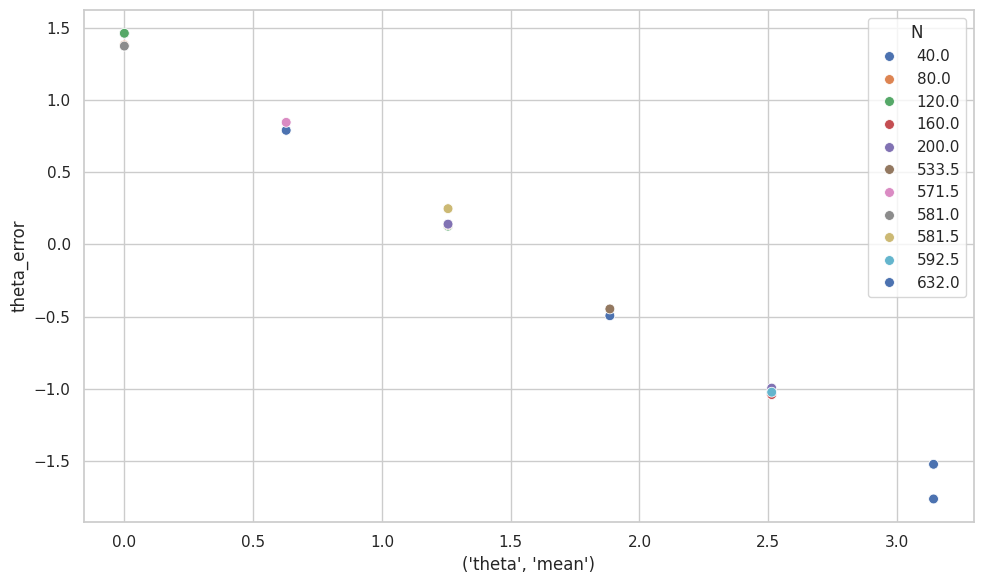

In [75]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("theta_error"),
                hue="N", palette="deep", s=50)


plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

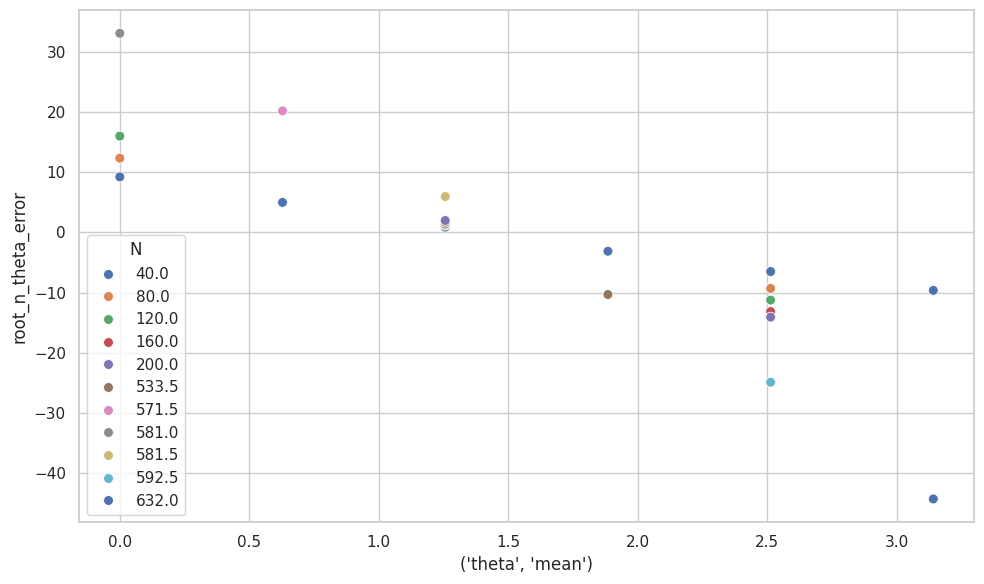

In [76]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("root_n_theta_error"),
                hue="N", palette="deep", s=50)


plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

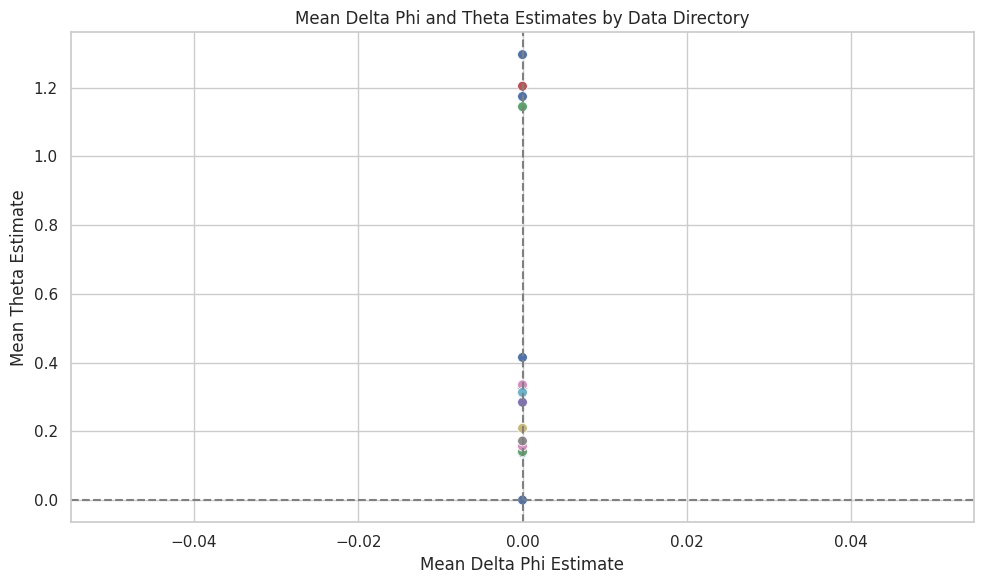

In [77]:
# plot the means as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("delta_phi", "mean"),
                y=("delta_phi_estimate", "mean"),
                hue=estimates_summary_df["N"].astype(str),
                palette="deep", s=50)
plt.title("Mean Delta Phi and Theta Estimates by Data Directory")
plt.xlabel("Mean Delta Phi Estimate")
plt.ylabel("Mean Theta Estimate")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_delta_phi_theta_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

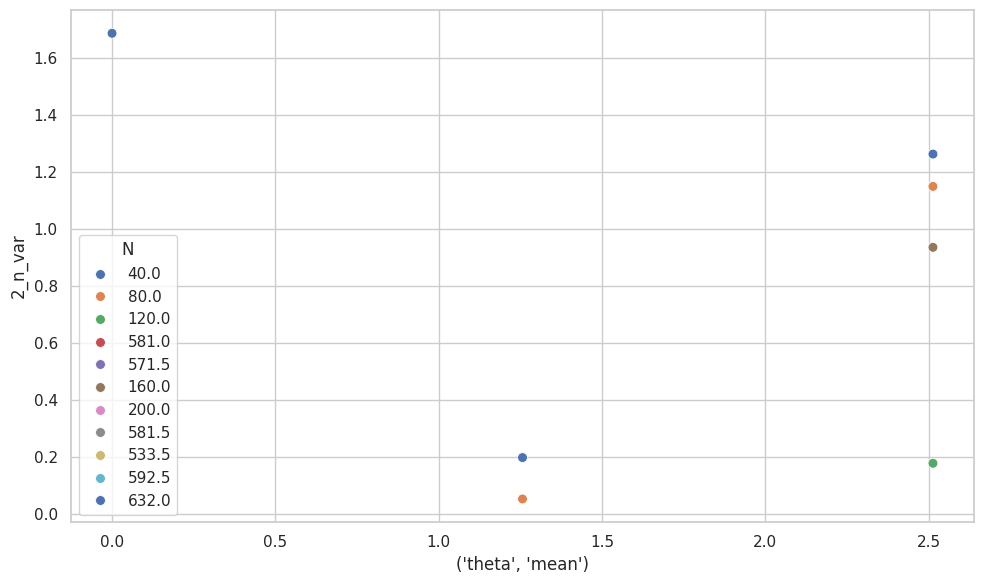

In [78]:
# plot the variances against the true value of theta as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"), y=("2_n_var"),
                hue=estimates_summary_df["N"].astype(str),
                palette="deep", s=50)


plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "variance_theta_delta_phi_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()